In [28]:
from io import StringIO
import os
import boto3
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns



In [10]:
aws_access_key_id=os.getenv("AWS_ACCESS_KEY")
aws_secret_key=os.getenv("AWS_SECRET_KEY")

In [11]:
def read_csv_from_s3(bucket: str,path: str, filename:str) ->pd.DataFrame:
    
    s3=boto3.client("s3",aws_access_key_id=aws_access_key_id,aws_secret_access_key=aws_secret_key) 
    full_path = f"{path}{filename}"
    
    object = s3.get_object(Bucket=bucket, Key=full_path)
    object = object["Body"].read().decode("utf-8")
    output_df = pd.read_csv(StringIO(object))

    return output_df

In [12]:
s3=boto3.client("s3",aws_access_key_id=aws_access_key_id,aws_secret_access_key=aws_secret_key) 

bucket="dataengineerea"


community_areas_path= "transformed_data/community_areas/"
company_path="transformed_data/company/"
date_path="transformed_data/date/"
payment_type_path="transformed_data/payment_type/"
taxi_trips_path="transformed_data/taxi_trips/"
weather_path="transformed_data/weather/"

In [15]:
community_areas=payment_type = read_csv_from_s3(bucket=bucket,path=community_areas_path,filename="community_areas_master.csv")
company = read_csv_from_s3(bucket=bucket,path=company_path,filename="company_master.csv")
date = read_csv_from_s3(bucket=bucket,path=date_path,filename="date_dimension.csv")
payment_type = read_csv_from_s3(bucket=bucket,path=payment_type_path,filename="payment_type_master.csv")

In [16]:
trips_list=[]
weather_list=[]

In [17]:
# Taxi dataa transformation and laoding
for file in s3.list_objects(Bucket=bucket, Prefix=taxi_trips_path)["Contents"]:
    taxi_trip_key = file['Key']
    
    if taxi_trip_key.split("/")[-1].strip() !="":
        if taxi_trip_key.split(".")[1] =="csv":
            filename=taxi_trip_key.split("/")[-1]
            trip=read_csv_from_s3(bucket, taxi_trips_path , filename)

            trips_list.append(trip)
            print(f"{filename} has been added")

  

taxi_2024-10-20.csv has been added
taxi_2024-10-21.csv has been added
taxi_2024-10-22.csv has been added
taxi_2024-10-23.csv has been added
taxi_2024-10-24.csv has been added
taxi_2024-10-25.csv has been added
taxi_2024-10-26.csv has been added
taxi_2024-10-27.csv has been added
taxi_2024-10-28.csv has been added
taxi_2024-10-29.csv has been added
taxi_2024-10-30.csv has been added
taxi_2024-10-31.csv has been added
taxi_2024-11-01.csv has been added
taxi_2024-11-02.csv has been added
taxi_2024-11-03.csv has been added
taxi_2024-11-04.csv has been added
taxi_2024-11-05.csv has been added


In [18]:
trips=pd.concat(trips_list, ignore_index=True)

In [19]:
trips

,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area_id,dropoff_community_area_id,fare,tips,tolls,extras,trip_total,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude,datetime_for_weather,payment_type_id,company_id
0,69eff3211ce9216d6e099744a67e1e6a6aef6736,15ebaceb1f5e522414ecc2fb3af8775a525ccbb8427e69...,2024-10-20T23:45:00.000,2024-10-20T23:45:00.000,7,0.03,8,8,3.25,0.00,0.0,0.0,3.25,41.899602,-87.633308,41.899602,-87.633308,2024-10-20 23:00:00,2,8
1,6a39028d37df4a36cfe07dcf45f1ac3f459536d0,0642efa0706335c4f47ec1f5d0f84bbc4cedaeb693a0f4...,2024-10-20T23:45:00.000,2024-10-21T01:00:00.000,4774,9.84,32,2,44.75,0.00,0.0,0.0,44.75,41.878866,-87.625192,42.001571,-87.695013,2024-10-20 23:00:00,2,6
2,6af2d447117b17336f8537da30b091990546f30b,ebdfb00f38c617622248af90f5f2d6b5b43cd03e925411...,2024-10-20T23:45:00.000,2024-10-21T00:00:00.000,300,0.50,8,8,5.00,0.03,0.0,0.0,5.03,41.899602,-87.633308,41.899602,-87.633308,2024-10-20 23:00:00,3,13
3,6bfc57150466f4970937df5d67cc567fa8418136,d31f81c999a017a3516da0b9a9fd96abf7e4ea8333e94a...,2024-10-20T23:45:00.000,2024-10-21T00:00:00.000,1259,16.65,76,24,41.00,9.10,0.0,4.0,54.60,41.980264,-87.913625,41.901207,-87.676356,2024-10-20 23:00:00,3,4
4,78912b5c510d5a8a3fc75090eb98f341bd4b4dcd,641c9356c873f4b5fb13d4b2f70d8b4d4b7b2c98057272...,2024-10-20T23:45:00.000,2024-10-21T00:00:00.000,1140,0.00,56,8,45.00,11.35,0.0,0.0,56.35,41.792592,-87.769615,41.899602,-87.633308,2024-10-20 23:00:00,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289420,38d2567851a6b7918dbfca50796169bcda264c4d,3b4da267511934cb42da9f200f346b4719f5d5d761e0a5...,2024-11-05T00:00:00.000,2024-11-05T00:30:00.000,1878,25.22,76,69,60.25,5.00,0.0,4.0,69.75,41.980264,-87.913625,41.763247,-87.616134,2024-11-05 00:00:00,3,1
289421,34b62c750133fe005533a67485bb018ff83f33a4,57f4e1888791b2147f4c4add8f476ac881451d6eef6dca...,2024-11-05T00:00:00.000,2024-11-05T00:30:00.000,1097,12.10,76,5,30.75,5.00,0.0,4.0,40.25,41.980264,-87.913625,41.947792,-87.683835,2024-11-05 00:00:00,3,3
289422,3379ea0d8c9e1f2d09ca161e3a3ab5e6d6cde607,66d3807bc1b0bcf7c3b90c19f7c13356cdd60995199804...,2024-11-05T00:00:00.000,2024-11-05T00:30:00.000,1186,11.58,8,43,30.00,0.00,0.0,0.0,30.00,41.899602,-87.633308,41.761578,-87.572782,2024-11-05 00:00:00,1,1
289423,2543e7e0d864909fa88f63e7bfeeee7fd5f04405,ea9c7f865233f880e5f00abb728092901eeaf52c85a8c1...,2024-11-05T00:00:00.000,2024-11-05T00:15:00.000,900,8.00,8,1,21.75,0.00,0.0,0.0,21.75,41.899602,-87.633308,42.009623,-87.670167,2024-11-05 00:00:00,2,13


In [20]:
#Weather data transformation and loading
for file in s3.list_objects(Bucket=bucket, Prefix=weather_path)["Contents"]:
    weather_key = file["Key"]
    if weather_key.endswith(".csv"):
        print(f"Processing file: {weather_key}")
            
        filename=weather_key.split("/")[-1]
        weather_daily=read_csv_from_s3(bucket, weather_path , filename)
        weather_list.append(weather_daily)
        print(f"{filename} has been added")



Processing file: transformed_data/weather/weather_2024-10-10.csv
weather_2024-10-10.csv has been added
Processing file: transformed_data/weather/weather_2024-10-23.csv
weather_2024-10-23.csv has been added
Processing file: transformed_data/weather/weather_2024-10-24.csv
weather_2024-10-24.csv has been added
Processing file: transformed_data/weather/weather_2024-10-25.csv
weather_2024-10-25.csv has been added
Processing file: transformed_data/weather/weather_2024-10-26.csv
weather_2024-10-26.csv has been added
Processing file: transformed_data/weather/weather_2024-10-27.csv
weather_2024-10-27.csv has been added
Processing file: transformed_data/weather/weather_2024-10-28.csv
weather_2024-10-28.csv has been added
Processing file: transformed_data/weather/weather_2024-10-29.csv
weather_2024-10-29.csv has been added
Processing file: transformed_data/weather/weather_2024-10-30.csv
weather_2024-10-30.csv has been added
Processing file: transformed_data/weather/weather_2024-10-31.csv
weather_

In [21]:
weather=pd.concat(weather_list, ignore_index=True)
weather

,datetime,temperature,wind_speed,rain,precipitation
0,2024-10-10 00:00:00,16.1,16.1,0.0,0.0
1,2024-10-10 01:00:00,15.5,18.2,0.0,0.0
2,2024-10-10 02:00:00,15.2,17.8,0.0,0.0
3,2024-10-10 03:00:00,15.0,17.6,0.0,0.0
4,2024-10-10 04:00:00,14.7,16.7,0.0,0.0
...,...,...,...,...,...
355,2024-11-05 19:00:00,20.0,32.3,0.1,0.1
356,2024-11-05 20:00:00,19.3,36.0,0.5,0.5
357,2024-11-05 21:00:00,18.5,30.0,1.0,1.0
358,2024-11-05 22:00:00,18.1,29.8,1.2,1.2


### Join them together

In [22]:
trips_full=pd.merge(trips,weather,left_on="datetime_for_weather", right_on="datetime", how="inner")
trips_full=trips_full.drop(columns=["datetime"])
trips_full.head()

,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area_id,dropoff_community_area_id,fare,tips,...,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude,datetime_for_weather,payment_type_id,company_id,temperature,wind_speed,rain,precipitation
0,a86a77a24d6e50b452dbdd5ced615c4105838481,9aa3a93e0b6e0555523d1554d51db2037c14c34125117b...,2024-10-23T23:45:00.000,2024-10-24T00:00:00.000,420,1.70,28,32,7.50,2.00,...,-87.663518,41.878866,-87.625192,2024-10-23 23:00:00,3,7,14.0,11.1,0.0,0.0
1,acc49802e6817567d01b8609b781c839b77c9d8f,bec564bc76ead09ce3ff6220d91e4e0a1b7432a5dbeb76...,2024-10-23T23:45:00.000,2024-10-24T00:00:00.000,1440,16.50,76,24,41.25,13.70,...,-87.913625,41.901207,-87.676356,2024-10-23 23:00:00,3,7,14.0,11.1,0.0,0.0
2,b01585bf8ad646e63c252f487d507be3120e7127,b41e8c8124d8d600a4db8b7c176c2956756d378c749cb1...,2024-10-23T23:45:00.000,2024-10-24T00:00:00.000,420,0.00,8,8,13.25,2.75,...,-87.633308,41.899602,-87.633308,2024-10-23 23:00:00,3,7,14.0,11.1,0.0,0.0
3,b547f9fce2476767b842609e1b043a5a2d44dd2f,4c8b6783201bdc422fd78043aceeea92a005af4c37bba7...,2024-10-23T23:45:00.000,2024-10-24T00:15:00.000,1326,12.98,56,8,33.75,6.85,...,-87.769615,41.899602,-87.633308,2024-10-23 23:00:00,3,14,14.0,11.1,0.0,0.0
4,c0449fa612c9fad22b709e49f174dceaa7c04632,3c8a3a5b0785d40229dd7adc5fd0d9620defca885601bf...,2024-10-23T23:45:00.000,2024-10-24T00:00:00.000,1500,14.70,56,8,37.50,8.55,...,-87.769615,41.899602,-87.633308,2024-10-23 23:00:00,3,7,14.0,11.1,0.0,0.0


C:\Users\Admin\AppData\Local\Temp\ipykernel_6204\1647214493.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='payment_type_id', y='fare', data=trips_full, palette='Set3', inner="point")


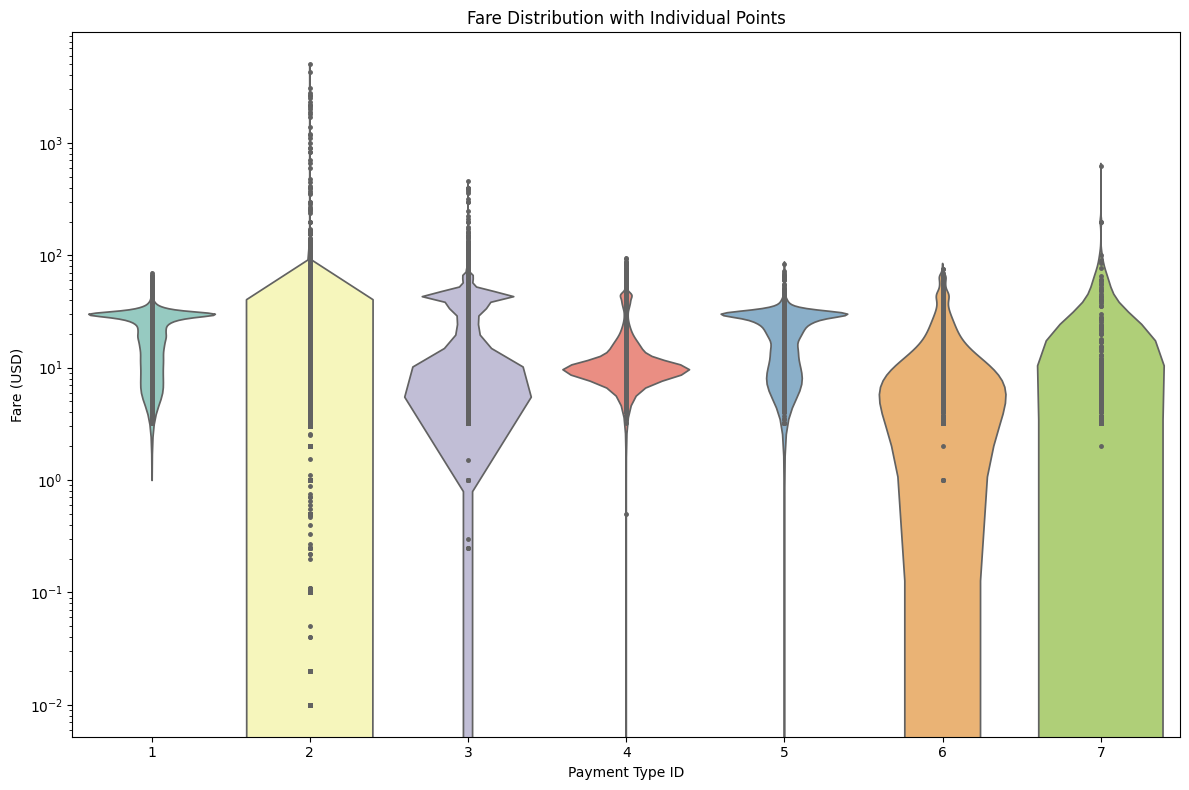

In [23]:
# Create a violin plot showing fare distribution by payment type
plt.figure(figsize=(12, 8))
sns.violinplot(x='payment_type_id', y='fare', data=trips_full, palette='Set3', inner="point")

# Apply a logarithmic scale for better visualization of fare distribution
plt.yscale('log')

# Set titles and labels for the plot
plt.title('Fare Distribution with Individual Points')
plt.xlabel('Payment Type ID')
plt.ylabel('Fare (USD)')


plt.tight_layout()
plt.show()

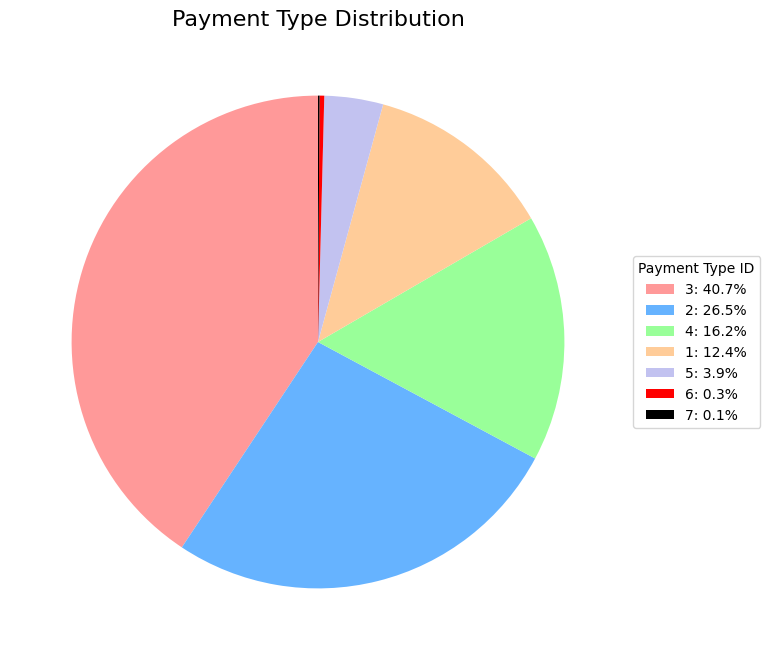

In [24]:
# Calculate the frequency of each payment type
sizes = trips_full['payment_type_id'].value_counts()

# Define colors 
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0', '#ff0000', '#000000']  

# Create the base pie chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts = ax.pie(
    sizes, 
    colors=colors, 
    startangle=90
)


plt.legend(wedges, [f'{index}: {percent:.1f}%' for index, percent in zip(sizes.index, (sizes / sizes.sum()) * 100)],
           title="Payment Type ID", loc="center left", bbox_to_anchor=(1, 0.5))

# Set the title of the chart
plt.title('Payment Type Distribution', fontsize=16)
plt.show()

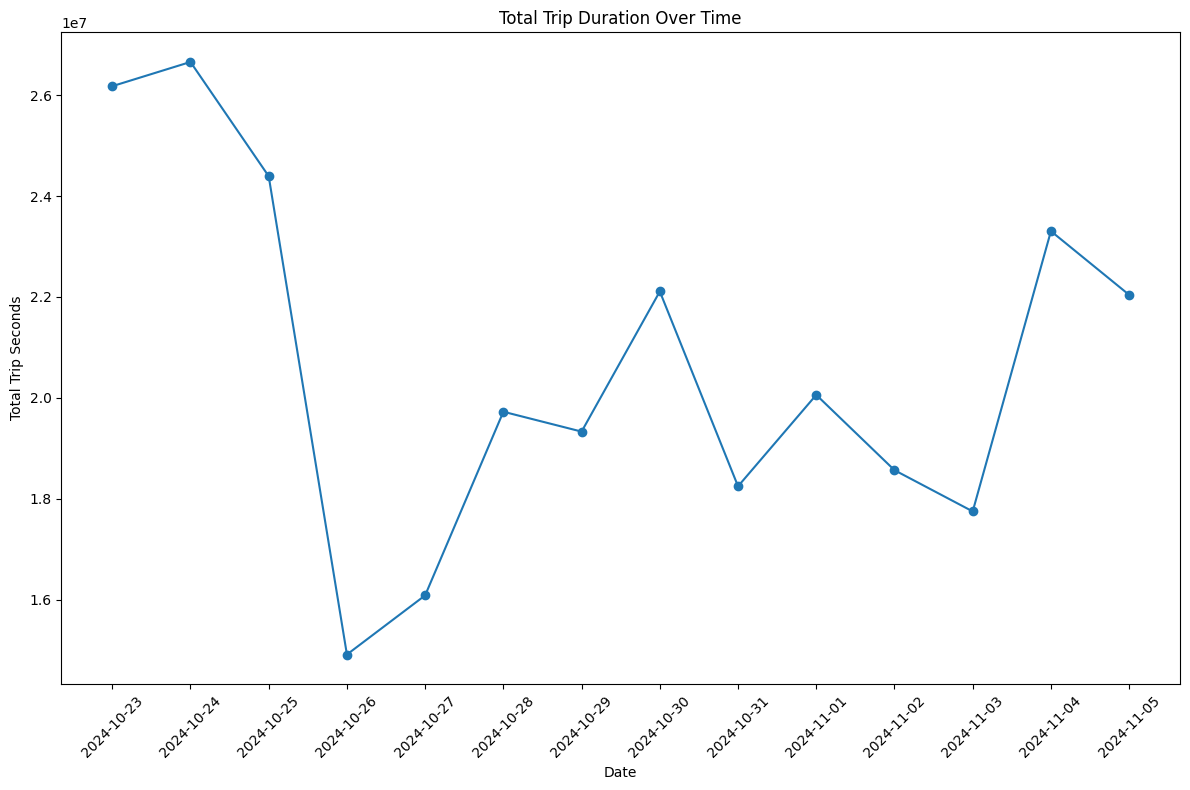

In [25]:
# Convert date and group by day
trips_full['trip_start_timestamp'] = pd.to_datetime(trips_full['trip_start_timestamp'])
data = trips_full.groupby(trips_full['trip_start_timestamp'].dt.date)['trip_seconds'].sum()

# Create the plot
plt.figure(figsize=(12, 8))
plt.plot(data.index, data.values, marker='o')

# Rotate x-axis labels
plt.xticks(data.index, data.index, rotation=45)

# Set title and axis labels
plt.title('Total Trip Duration Over Time')
plt.xlabel('Date')
plt.ylabel('Total Trip Seconds')
plt.tight_layout()
plt.show()

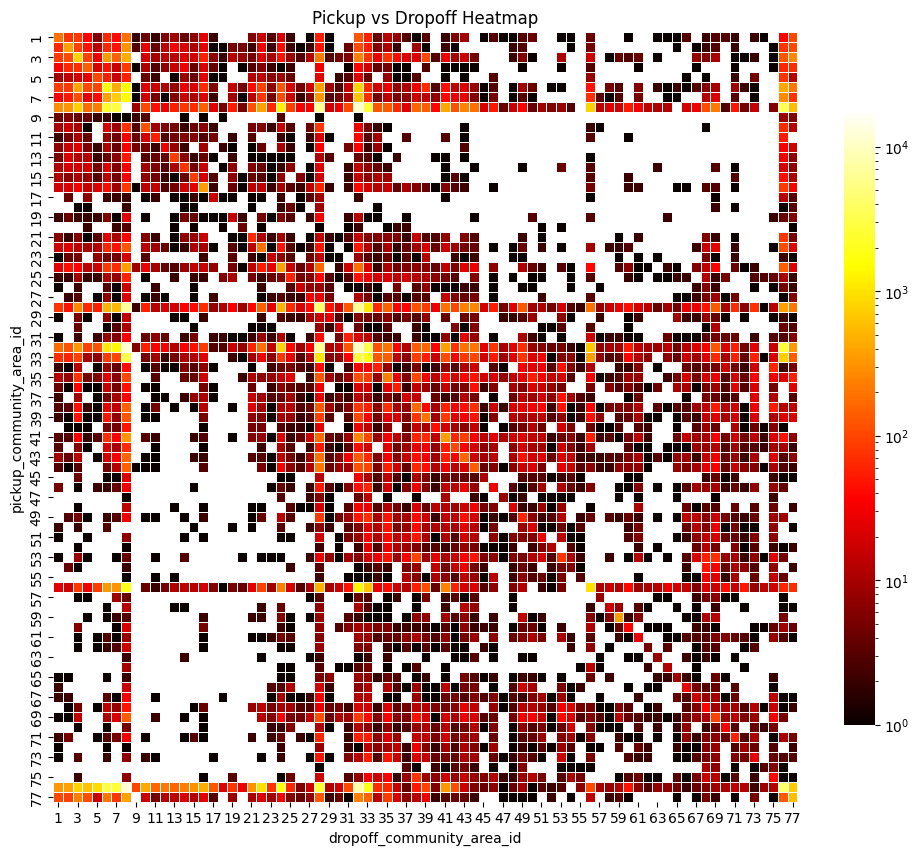

In [ ]:
# Create a pivot table for pickup and dropoff area counts
heatmap_data = trips_full.pivot_table(
    index='pickup_community_area_id', 
    columns='dropoff_community_area_id', 
    aggfunc='size',  
    fill_value=0     
)


plt.figure(figsize=(12,10))

# Generate the heatmap with logarithmic scaling
sns.heatmap(
    heatmap_data, 
    cmap="hot",                  
    norm=LogNorm(),              # Logarithmic scale for better visibility 
    annot=False,                 
    linewidths=0.5,              
    cbar_kws={"shrink": 0.8}     
)

# title for the heatmap
plt.title('Pickup vs Dropoff Heatmap')
plt.show()

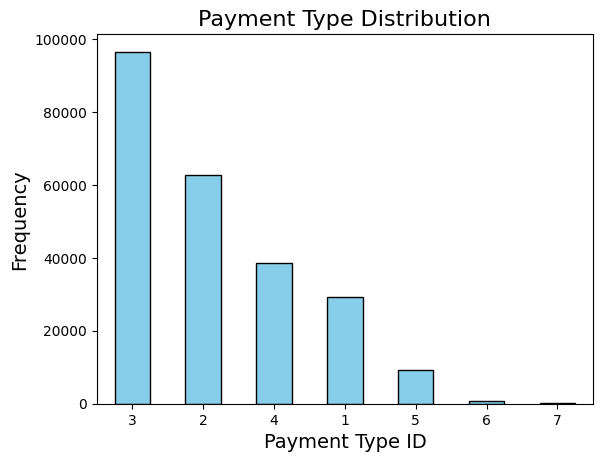

In [26]:
# Create a bar plot showing the frequency of each payment type
trips_full['payment_type_id'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')

# Customize the chart with titles and labels
plt.title('Payment Type Distribution', fontsize=16)
plt.xlabel('Payment Type ID', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal for better readability
plt.show()